# Preprocess Dataset

In [16]:
# import package
import pandas as pd

# Dataset
Read the train.csv and delete the rows with missing values.

In [17]:
# load data
train_df = pd.read_csv('train_raw.csv', sep='\t', encoding='utf-8')
print(f"Training data shape: {train_df.shape}")
print(train_df.head())

Training data shape: (4987, 2)
                                                text label
0  Get the latest from TODAY Sign up for our news...     1
1  2d  Conan On The Funeral Trump Will Be Invited...     1
2  It’s safe to say that Instagram Stories has fa...     0
3  Much like a certain Amazon goddess with a lass...     0
4  At a time when the perfect outfit is just one ...     0


# Data Cleaning

In [18]:
# check NaN values
print(f"Null values in training data:")
print(train_df.isnull().sum())

Null values in training data:
text     0
label    0
dtype: int64


In [19]:
# print unique labels
print(f"Unique labels in training data:")
print(train_df['label'].unique())

Unique labels in training data:
['1' '0' 'label']


Delete the data whose label is not ['0', '1']

In [20]:
# find the row that label == 'label'
print(f"Rows with label 'label':")
print(train_df[train_df['label'] == 'label'])

Rows with label 'label':
         text  label
1615  content  label


In [21]:
# remove the row that label == 'label'
train_df = train_df[train_df['label'] != 'label']

# save labels as int type
train_df['label'] = train_df['label'].astype(int)

In [22]:
# reset the index
train_df.reset_index(drop=True, inplace=True)

# info
print(f"train info:")
print(train_df.info())
print(train_df.head())
print(train_df.shape)

train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986 entries, 0 to 4985
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4986 non-null   object
 1   label   4986 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.0+ KB
None
                                                text  label
0  Get the latest from TODAY Sign up for our news...      1
1  2d  Conan On The Funeral Trump Will Be Invited...      1
2  It’s safe to say that Instagram Stories has fa...      0
3  Much like a certain Amazon goddess with a lass...      0
4  At a time when the perfect outfit is just one ...      0
(4986, 2)


## Output

In [23]:
train_df.to_csv('train.csv', sep='\t', index=False, encoding='utf-8')
print(f"Training data saved as train.csv")

Training data saved as train.csv


# EDA

In [34]:
import matplotlib.pyplot as plt
import numpy as np

Label distribution:
Label 0: 2972 samples
Label 1: 2014 samples


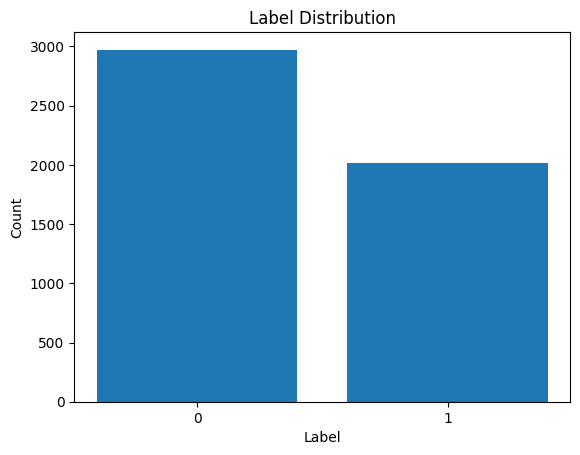

In [42]:
# plot label distribution
labels, counts = np.unique(train_df['label'], return_counts=True)
print(f"Label distribution:")
for label, count in zip(labels, counts):
    print(f"Label {label}: {count} samples")

# plt.figure(figsize=(10, 5))
plt.bar(labels, counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(labels)
plt.title('Label Distribution')
plt.show()